<a href="https://colab.research.google.com/github/samaalharbi2/T5/blob/main/Time_Series_Forecasting_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [457]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [458]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout,GRU
SEED = 42
np.random.seed(SEED)
import warnings
warnings.filterwarnings('ignore')

In [459]:
df = pd.read_csv('/content/drive/MyDrive/SADIA T5/Aquifer_Petrignano.csv',parse_dates=['Date'],index_col='Date')

In [460]:
# first 5 rows , the date is not sorted + Data qabs + Zero Values + Different Scales
df.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


In [461]:
# last 5 rows
df.tail()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2018-01-24,0.0,-27.82,-27.31,5.4,5.3,-29072.736,2.7
2008-02-13,NaN,-31.30,-30.63,NaN,NaN,-32861.376,NaN
2009-06-06,0.0,-27.97,-27.36,22.5,21.4,-31509.216,2.1
2008-03-25,NaN,-31.07,-30.52,NaN,NaN,-27031.104,NaN
2012-10-29,0.0,-34.42,-33.71,7.4,6.9,-36827.136,2.0


In [462]:
# random rows
df.sample()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2007-10-26,NaN,-30.51,-29.87,NaN,NaN,-25964.064,NaN


In [463]:
# we have missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5223 entries, 2009-07-28 to 2012-10-29
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rainfall_Bastia_Umbra                 4199 non-null   float64
 1   Depth_to_Groundwater_P24              5168 non-null   float64
 2   Depth_to_Groundwater_P25              5184 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Temperature_Petrignano                4199 non-null   float64
 5   Volume_C10_Petrignano                 5025 non-null   float64
 6   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7)
memory usage: 326.4 KB


In [464]:

df.sort_values(by='Date', inplace=True)




In [465]:
df.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [466]:
df.shape

(5223, 7)

In [467]:
# check outliers
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319188,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.252500,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.995000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-18.440000,-19.100000,33.000000,31.100000,0.000000,4.100000


how to handle outliers ?
1- delete them
2- resample
3- keep them

In [468]:
q1 = df['Rainfall_Bastia_Umbra'].quantile(0.25)
q3= df['Rainfall_Bastia_Umbra'].quantile(0.75)
iqr =q3-q1

In [469]:
lower = q1- (1.5*iqr)

upper = q3 + (1.5*iqr)

upper

0.25

In [470]:
outliers_fliter = df.loc[(df['Rainfall_Bastia_Umbra']< lower)|(df['Rainfall_Bastia_Umbra']> upper)]

In [471]:
for col in df.columns:
  fig=px.box(df,y=col)
  fig.show()

In [472]:
new_df = df.copy()

In [473]:
new_df.loc[(df['Rainfall_Bastia_Umbra']< lower) , 'Rainfall_Bastia_Umbra'] = lower
new_df.loc [(df['Rainfall_Bastia_Umbra'] > upper) , 'Rainfall_Bastia_Umbra'] = upper

In [474]:
fig = px.box(new_df, y='Rainfall_Bastia_Umbra')
fig.show()

In [475]:
new_df.loc[(df['Volume_C10_Petrignano'] < lower),'Volume_C10_Petrignano'] = lower
new_df.loc[(df['Volume_C10_Petrignano'] > upper),'Volume_C10_Petrignano'] = upper

In [476]:
fig = px.box(new_df, y='Volume_C10_Petrignano')
fig.show()

In [477]:
new_df.loc[(df['Hydrometry_Fiume_Chiascio_Petrignano'] < lower),'Hydrometry_Fiume_Chiascio_Petrignano'] = lower
new_df.loc[(df['Hydrometry_Fiume_Chiascio_Petrignano'] > upper),'Hydrometry_Fiume_Chiascio_Petrignano'] = upper

In [478]:
fig = px.box(new_df, y='Hydrometry_Fiume_Chiascio_Petrignano')
fig.show()

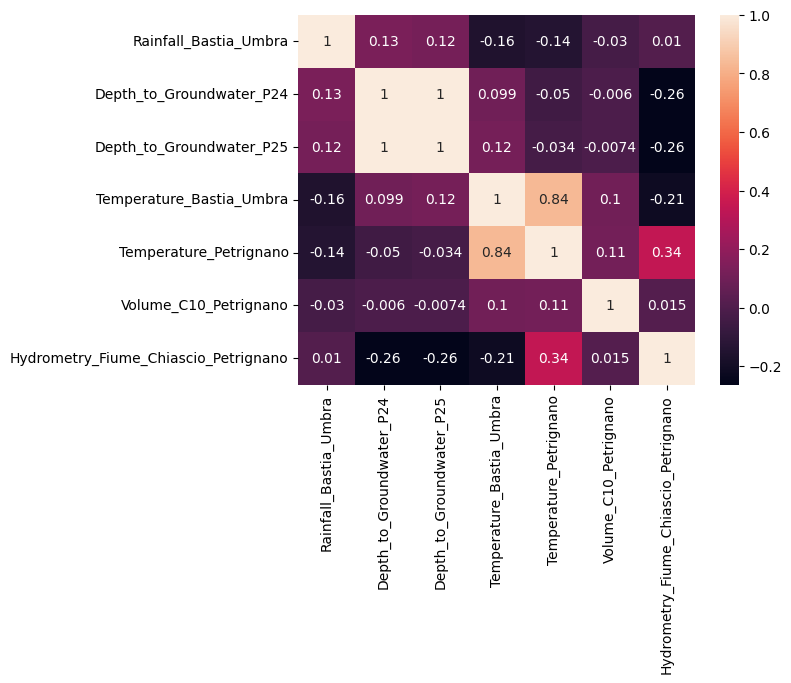

In [479]:
# we have notied depth = depth and temp = temp
fig = fisize=(10.5)
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [480]:
new_df.drop(['Depth_to_Groundwater_P25','Temperature_Bastia_Umbra'],axis = 1 , inplace= True)

In [481]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5223 entries, 2006-03-14 to 2020-06-30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rainfall_Bastia_Umbra                 4199 non-null   float64
 1   Depth_to_Groundwater_P24              5168 non-null   float64
 2   Temperature_Petrignano                4199 non-null   float64
 3   Volume_C10_Petrignano                 5025 non-null   float64
 4   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5)
memory usage: 244.8 KB


In [482]:
# Changing column names is useful for time series.
new_df.columns = ['Rainfall','Depth_to_Groundwater','Temperature',' Volume','Hydrometry']

In [483]:
new_df.isnull().sum()

,0
Rainfall,1024
Depth_to_Groundwater,55
Temperature,1024
Volume,198
Hydrometry,1024


In [484]:
new_df['Depth_to_Groundwater'].value_counts()


,count
Depth_to_Groundwater,
-27.13,18
-27.16,15
-23.71,14
-24.77,14
-26.96,14
...,...
-32.02,1
-31.87,1
-19.94,1


In [485]:
new_df['Depth_to_Groundwater'].unique()

array([-22.48, -22.38, -22.25, ..., -25.73, -30.14, -24.93])

In [486]:
new_df['Rainfall'].value_counts()

,count
Rainfall,
0.00,3147
0.25,849
0.20,139
0.10,64


In [487]:
new_df['Rainfall'].unique()

array([ nan, 0.  , 0.25, 0.1 , 0.2 ])

In [488]:
new_df['Temperature'].unique()

array([ nan,  4.9,  2.5,  3.9,  0.8, -2.1, -0.7, -0.3,  6.6,  4.8,  4.2,
        4.5,  6.3,  8.1,  7.1,  5.3,  1.6,  6.4, 10.3, 12. ,  9. ,  7.6,
        5.6,  7.7,  0. ,  5.9,  3.4,  4.1,  5.1,  9.1,  8.3, 10.9, 10.1,
        8.9,  6.7,  5.7,  3.3,  1.7,  1.1,  1.5, -0.1,  0.9,  0.6,  2.6,
        4.3,  4.7,  4.4,  7.5,  6.8,  8.6,  9.4,  9.5,  6.9,  8.8,  7.4,
       10.6, 11.8, 10.7, 10. ,  2.9,  8.4,  7.3,  8.2, 10.2, 14. , 16.1,
       13.5, 13.3, 12.3, 12.4, 13.4, 14.2, 13.9, 13.8, 13.6, 14.9, 14.3,
       14.1, 12.1, 14.6, 13. , 12.7, 15.2, 11.9, 13.7, 15.6, 13.2, 14.7,
       15.5, 16.7, 17.2, 17.5, 17.4, 18. , 18.2, 19. , 18.1, 17.8, 20.6,
       21.4, 21.6, 21.1, 21.2, 22.2, 22.6, 22.4, 23.5, 24.8, 24.2, 18.4,
       14.8, 19.2, 20.5, 18.9, 18.8, 20.1, 21.9, 23.7, 24.4, 24.3, 23.4,
       23.1, 24.5, 20.9, 18.5, 15.9, 20.2, 19.1, 17.7, 20. , 22.8, 22.9,
       21.3, 21.8, 24.7, 24.1, 20.7, 22. , 25.6, 25.9, 26.9, 27.1, 22.5,
       21.7, 22.3, 22.7, 25. , 26.8, 29.8, 26.4, 25

In [489]:
new_df['Temperature'].value_counts()

,count
Temperature,
0.0,153
10.3,29
12.8,27
10.1,27
13.6,26
...,...
-1.6,1
-1.3,1
-1.2,1


In [490]:
new_df[' Volume'].value_counts()

,count
Volume,
-0.15,4995
0.00,30


In [491]:

new_df['Hydrometry'].value_counts()

,count
Hydrometry,
0.25,4049
0.00,150


In [499]:
scaler=MinMaxScaler()
numerical_imputer = SimpleImputer(strategy='mean')
#df_bfill = new_df.fillna(method='bfill')
pipeline= make_pipeline(numerical_imputer,scaler)

new_df = pd.DataFrame(pipeline.fit_transform(new_df), index=new_df.index, columns=new_df.columns)

In [500]:
new_df.isnull().sum()

,0
Rainfall,0
Depth_to_Groundwater,0
Temperature,0
Volume,0
Hydrometry,0


In [433]:
new_df.head(10)


,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
Date,,,,,
2006-03-14,0.23477,0.747973,0.508189,0.00597,0.964277
2006-03-15,0.23477,0.754211,0.508189,0.00597,0.964277
2006-03-16,0.23477,0.762321,0.508189,0.00597,0.964277
2006-03-17,0.23477,0.754211,0.508189,0.00597,0.964277
2006-03-18,0.23477,0.740487,0.508189,0.00597,0.964277
2006-03-19,0.23477,0.756082,0.508189,0.00597,0.964277
2006-03-20,0.23477,0.746725,0.508189,0.00597,0.964277
2006-03-21,0.23477,0.758578,0.508189,0.00597,0.964277
2006-03-22,0.23477,0.758578,0.508189,0.00597,0.964277


In [434]:
new_df.tail()

,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
Date,,,,,
2020-06-26,0.0,0.548347,0.813031,0.0,1.0
2020-06-27,0.0,0.540861,0.827195,0.0,1.0
2020-06-28,0.0,0.540861,0.847025,0.0,1.0
2020-06-29,0.0,0.542109,0.855524,0.0,1.0
2020-06-30,0.0,0.533999,0.869688,0.0,1.0


In [104]:
#y = new_df['Depth_to_Groundwater_P24']
#x = new_df.drop('Depth_to_Groundwater_P24',axis=1)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

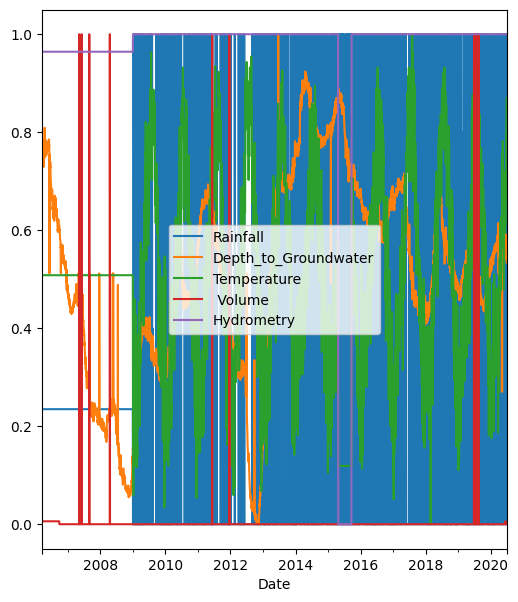

In [435]:
new_df.plot(figsize=(6,7))
plt.show()

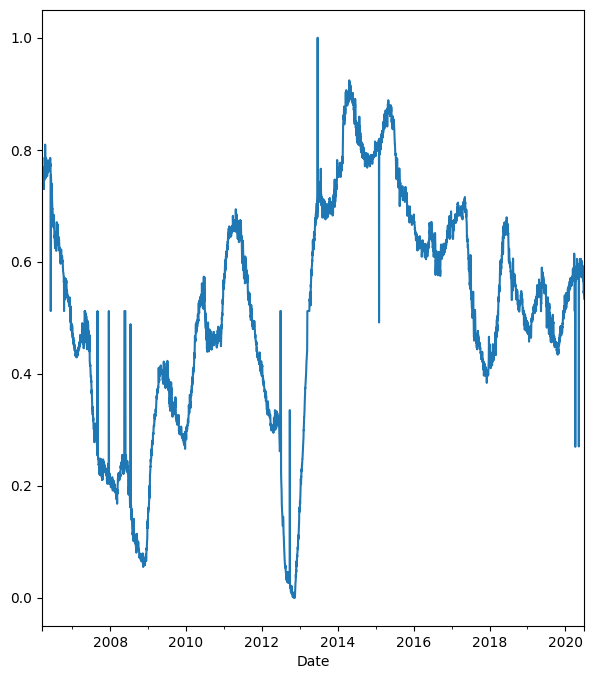

In [436]:
new_df['Depth_to_Groundwater'].plot(figsize=(7,8))
plt.show()

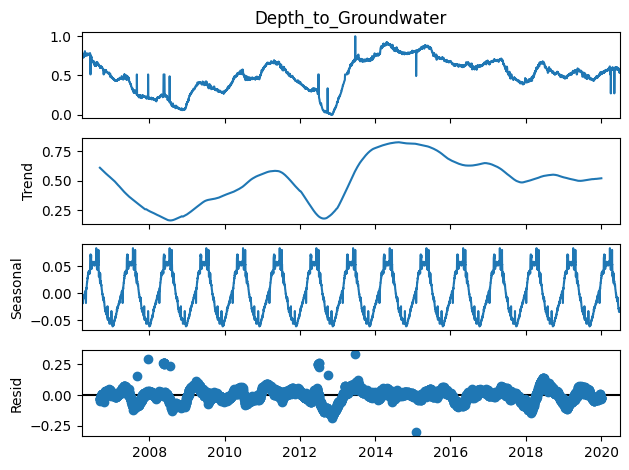

In [437]:
period = 356
result = seasonal_decompose(new_df['Depth_to_Groundwater'],model='additive',period=period)
result.plot()
plt.show()

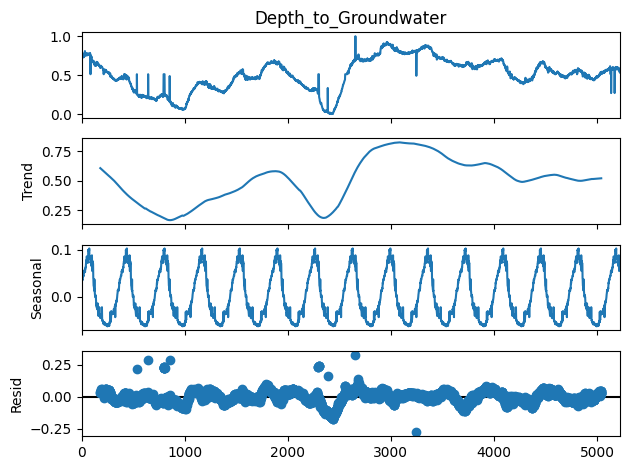

In [295]:
# Specify the period (e.g., 365 for yearly seasonality in daily data)
period = 365

# Analyze trends, seasonality, and potential outliers using the additive model
result = seasonal_decompose(new_df['Depth_to_Groundwater'], model='additive', period=period)

# Plot the results
result.plot()
plt.show()

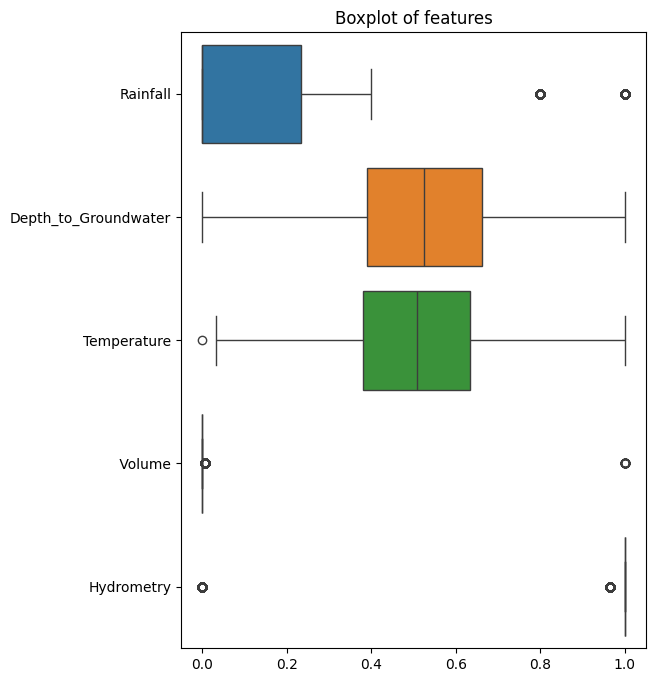

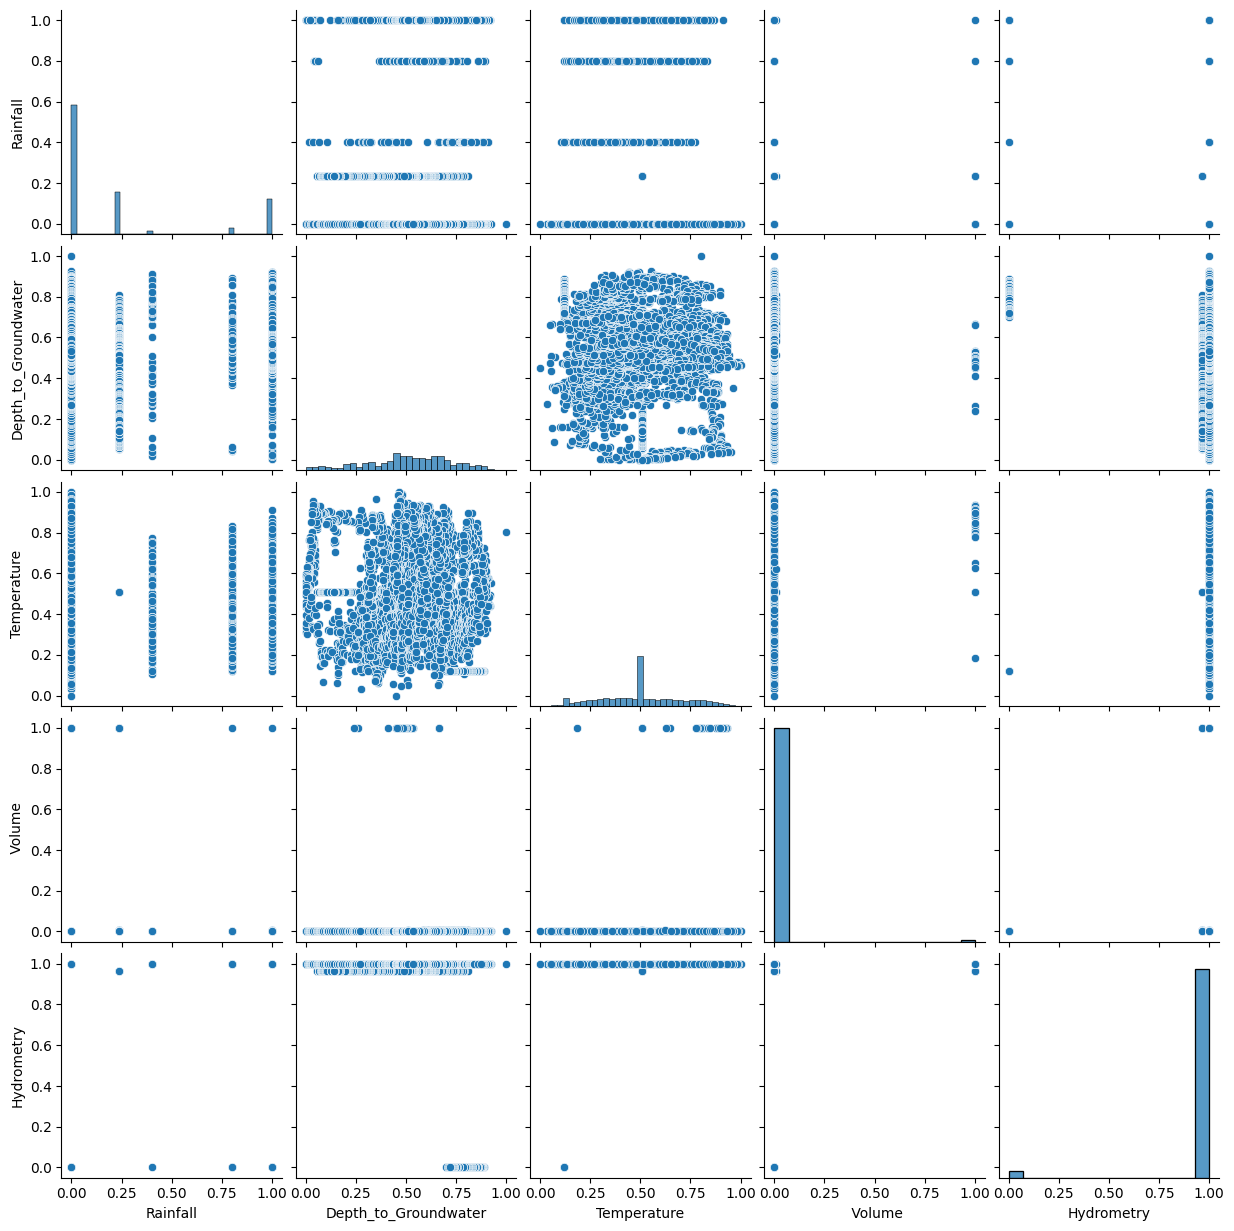

In [438]:
# plt boxplot to identify outliers
plt.figure(figsize=(6,8))
sns.boxplot(new_df,orient='h')
plt.title('Boxplot of features')
plt.show()
# data distribution
sns.pairplot(new_df)
plt.show()

In [445]:
# 1. Shift Method: Create the Prev_Depth_to_Groundwater_P24 column
new_df['Prev_Depth_to_Groundwater'] = new_df['Depth_to_Groundwater'].shift(1)

# 2. Extract date-based features
new_df['Day_of_Week'] = new_df.index.dayofweek  # 0=Monday, 6=Sunday
new_df['Month'] = new_df.index.month
new_df['Day_of_Year'] = new_df.index.dayofyear
new_df['IsWeekend'] = new_df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# 3. Difference between consecutive values
new_df['Diff_Depth_to_Groundwater'] = new_df['Depth_to_Groundwater'].diff()


In [446]:
new_df.head()

,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry,Prev_Depth_to_Groundwater,Day_of_Week,Month,Day_of_Year,IsWeekend,Diff_Depth_to_Groundwater
Date,,,,,,,,,,,
2006-03-14,0.23477,0.747973,0.508189,0.00597,0.964277,NaN,1,3,73,0,NaN
2006-03-15,0.23477,0.754211,0.508189,0.00597,0.964277,0.747973,2,3,74,0,0.006238
2006-03-16,0.23477,0.762321,0.508189,0.00597,0.964277,0.754211,3,3,75,0,0.008110
2006-03-17,0.23477,0.754211,0.508189,0.00597,0.964277,0.762321,4,3,76,0,-0.008110
2006-03-18,0.23477,0.740487,0.508189,0.00597,0.964277,0.754211,5,3,77,1,-0.013724


In [447]:
new_df['Prev_Depth_to_Groundwater'].isnull().sum()

1

In [448]:
new_df.dropna(inplace=True)

In [449]:
new_df.shape

(5222, 11)

In [450]:
from sklearn.model_selection import train_test_split

# Define the feature columns and the target column
X = new_df.drop(columns=['Depth_to_Groundwater'])
y = new_df['Depth_to_Groundwater']

# Split into training and testing sets (70% train, 30% test)
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Further split the test set into validation and final test sets (50% each from the test set)
val_data, test_data, y_val, y_test = train_test_split(test_data, y_test, test_size=0.5, shuffle=False)

print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (3655, 10)
Validation data shape: (783, 10)
Testing data shape: (784, 10)


In [452]:
def create_sequences(data, target, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        labels.append(target[i + window_size])
    return np.array(sequences), np.array(labels)

window_size = 10
X_train, y_train_seq = create_sequences(train_data, y_train.values, window_size)
X_val, y_val_seq = create_sequences(val_data, y_val.values, window_size)
X_test, y_test_seq = create_sequences(test_data, y_test.values, window_size)

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse',metrics=['mae'])

# Train the RNN model
history_rnn = rnn_model.fit(X_train, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val, y_val_seq))

# Evaluate the model on the test data
y_test_pred_rnn = rnn_model.predict(X_test)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0569 - mae: 0.7899 - val_loss: 0.0176 - val_mae: 0.1174
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0552 - mae: 0.2011 - val_loss: 0.0139 - val_mae: 0.1066
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0530 - mae: 0.1950 - val_loss: 0.0233 - val_mae: 0.1292
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0528 - mae: 0.1961 - val_loss: 0.0118 - val_mae: 0.0894
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0449 - mae: 0.1772 - val_loss: 0.0106 - val_mae: 0.0833
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0317 - mae: 0.1475 - val_loss: 0.0117 - val_mae: 0.0883
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - mae: 0.1064 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0582 - val_loss: 0.0046 - val_mae: 0.0553
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [453]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for both models
mse_rnn = mean_squared_error(y_test_seq, y_test_pred_rnn)
print(f'RNN Model MSE: {mse_rnn}')

RNN Model MSE: 0.001656313535878142


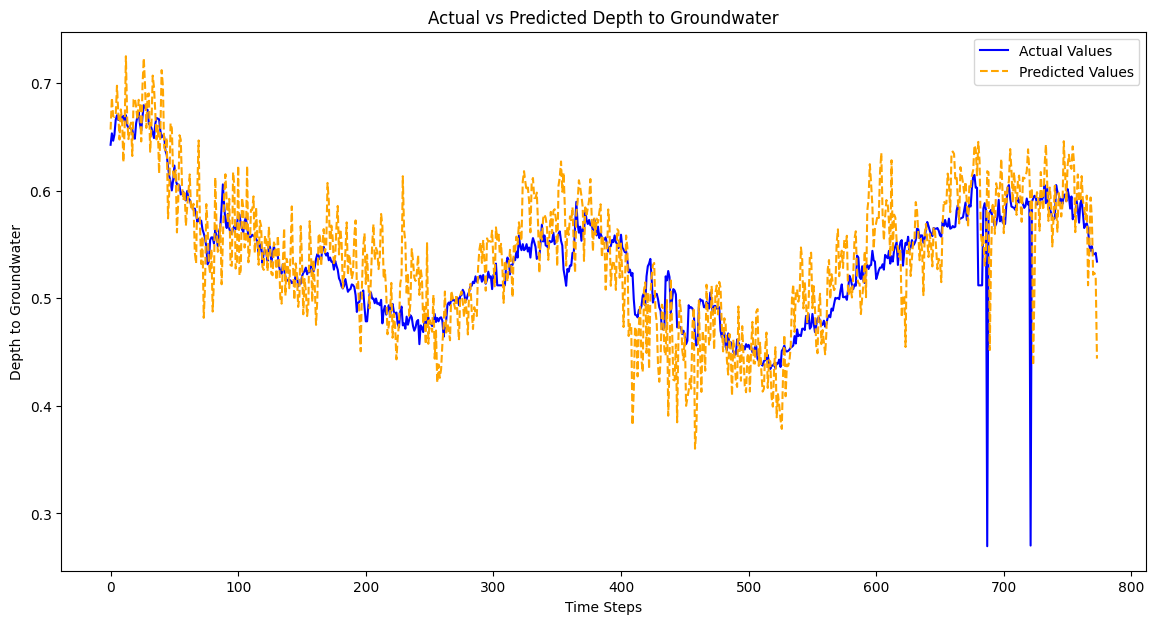

In [454]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test_seq, label='Actual Values', color='blue')
plt.plot(y_test_pred_rnn, label='Predicted Values', color='orange', linestyle='--')
plt.title('Actual vs Predicted Depth to Groundwater')
plt.xlabel('Time Steps')
plt.ylabel('Depth to Groundwater')
plt.legend()
plt.show()


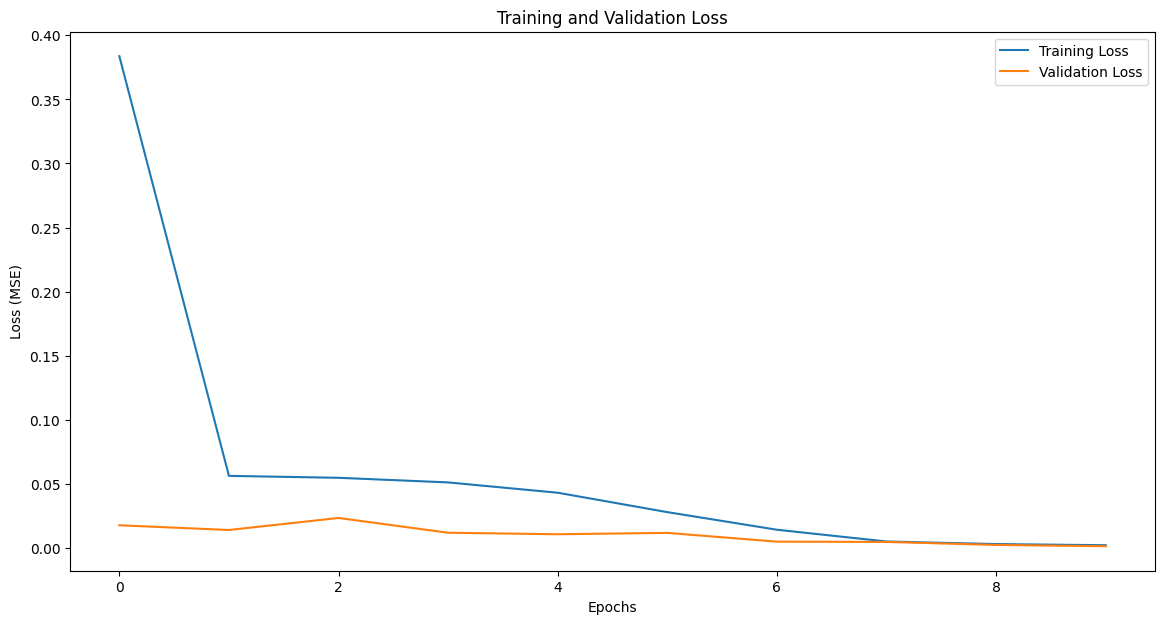

In [455]:
# Plotting the training loss and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.